# Training WideResNet on Cifar10 using SGD

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/MyDrive/DL_project/
!pwd

Mounted at /content/drive
/content/drive/MyDrive/DL_project
/content/drive/MyDrive/DL_project


In [ ]:
import torch
import torch.nn as nn
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import CIFAR10
from torchvision.datasets import CIFAR100
from torch.utils.data.dataloader import DataLoader
from torchvision.transforms import *
import os
import time
import gc
import shutil
import h5py

from dfw.dfw import DFW
from dfw.dfw.losses import set_smoothing_enabled
from dfw.dfw.losses import MultiClassHingeLoss
from dfw.experiments.models.densenet import DenseNet3
from dfw.experiments.models.wide_resnet import WideResNet

from train_utils import *

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
os.makedirs("data/cifar", exist_ok=True)
train_dataset_10 = CIFAR10(root='data/cifar', download=True, transform=transform)
test_dataset_10 = CIFAR10(root='data/cifar', train=False, transform=transform)
print(len(train_dataset_10), len(test_dataset_10))

train_dataset_100 = CIFAR100(root='data/cifar', download=True, transform=transform)
test_dataset_100 = CIFAR100(root='data/cifar', train=False, transform=transform)
print(len(train_dataset_100), len(test_dataset_100))

Files already downloaded and verified
50000 10000
Files already downloaded and verified
50000 10000


In [ ]:
trainer = Net_Trainer(device, 'wrn', 'wrn_sgd_c10', train_dataset_10, test_dataset_10, lr=0.1, optm='sgd', loss='ce', batch_size=128, epochs=100, 
                      weight_decay=5e-4, smooth=False, lr_decay=0.2, step=[60,120,160], mom=0.9)
best_epoch, losses, errors, accs = trainer.train()
plot_train(losses, errors, accs)
print('Best epoch:',best_epoch)

cuda Tesla P100-PCIE-16GB
Epoch:0   Loss:1.256   Val loss:1.041   Accuracy:64.043   Best val loss:1.041   Time taken:92.946
Epoch:1   Loss:0.71   Val loss:0.812   Accuracy:72.29   Best val loss:0.812   Time taken:92.93
Epoch:2   Loss:0.553   Val loss:0.683   Accuracy:76.553   Best val loss:0.683   Time taken:93.088
Epoch:3   Loss:0.468   Val loss:0.532   Accuracy:81.942   Best val loss:0.532   Time taken:93.033
Epoch:4   Loss:0.411   Val loss:0.707   Accuracy:76.839   Best val loss:0.532   Time taken:92.917
Epoch:5   Loss:0.379   Val loss:0.649   Accuracy:77.532   Best val loss:0.532   Time taken:92.716
Epoch:6   Loss:0.345   Val loss:0.589   Accuracy:80.795   Best val loss:0.532   Time taken:92.976
Epoch:7   Loss:0.322   Val loss:0.808   Accuracy:74.654   Best val loss:0.532   Time taken:93.04
Epoch:8   Loss:0.298   Val loss:0.534   Accuracy:82.15   Best val loss:0.532   Time taken:92.901
Epoch:9   Loss:0.293   Val loss:0.775   Accuracy:76.147   Best val loss:0.532   Time taken:92.86


In [ ]:
# Conitnue training by loading checkpoint
# Best epoch = epoch with least val loss
trainer = Net_Trainer(device, 'wrn', 'wrn_sgd_c10', train_dataset_10, test_dataset_10, load_ckpt='v1_ckpt_wrn_sgd_c10', lr=0.1, optm='sgd', loss='ce', batch_size=128, epochs=100, 
                      weight_decay=5e-4, smooth=False, lr_decay=0.2, step=[60,120,160], mom=0.9)
best_epoch, losses, errors, accs = trainer.train()
plot_train(losses, errors, accs)
print('Best epoch:',best_epoch)

cuda Tesla K80
Epoch:51   Loss:0.162   Val loss:0.49   Accuracy:84.494   Best val loss:0.454   Time taken:355.349
Epoch:52   Loss:0.158   Val loss:0.765   Accuracy:79.233   Best val loss:0.454   Time taken:355.498
Epoch:53   Loss:0.163   Val loss:0.532   Accuracy:83.683   Best val loss:0.454   Time taken:354.257
Epoch:54   Loss:0.16   Val loss:0.667   Accuracy:80.172   Best val loss:0.454   Time taken:355.293
Epoch:55   Loss:0.169   Val loss:0.491   Accuracy:84.187   Best val loss:0.454   Time taken:355.297
Epoch:56   Loss:0.157   Val loss:0.62   Accuracy:81.626   Best val loss:0.454   Time taken:356.217
Epoch:57   Loss:0.159   Val loss:0.516   Accuracy:84.167   Best val loss:0.454   Time taken:356.337
Epoch:58   Loss:0.155   Val loss:0.56   Accuracy:83.416   Best val loss:0.454   Time taken:356.113
Epoch:59   Loss:0.159   Val loss:0.526   Accuracy:83.92   Best val loss:0.454   Time taken:355.73
Epoch:60   Loss:0.036   Val loss:0.31   Accuracy:90.516   Best val loss:0.31   Time taken:3

cuda Tesla T4
Epoch:90   Loss:0.033   Val loss:0.47   Accuracy:87.273   Best val loss:0.31   Time taken:155.111
Epoch:91   Loss:0.033   Val loss:0.531   Accuracy:86.234   Best val loss:0.31   Time taken:162.231
Epoch:92   Loss:0.031   Val loss:0.483   Accuracy:86.778   Best val loss:0.31   Time taken:166.223
Epoch:93   Loss:0.034   Val loss:0.513   Accuracy:86.402   Best val loss:0.31   Time taken:167.389
Epoch:94   Loss:0.033   Val loss:0.514   Accuracy:86.135   Best val loss:0.31   Time taken:167.277
Epoch:95   Loss:0.036   Val loss:0.514   Accuracy:86.383   Best val loss:0.31   Time taken:167.392
Epoch:96   Loss:0.032   Val loss:0.563   Accuracy:85.641   Best val loss:0.31   Time taken:167.362
Epoch:97   Loss:0.036   Val loss:0.447   Accuracy:88.182   Best val loss:0.31   Time taken:167.361
Epoch:98   Loss:0.029   Val loss:0.497   Accuracy:86.491   Best val loss:0.31   Time taken:167.363
Epoch:99   Loss:0.032   Val loss:0.613   Accuracy:84.444   Best val loss:0.31   Time taken:167.4

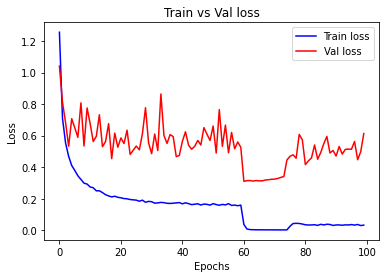

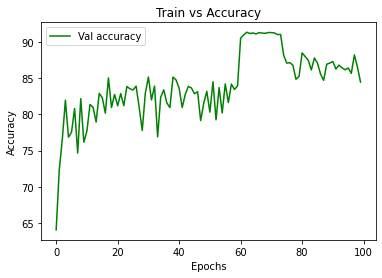

Best epoch: 60


In [ ]:
# Conitnue training by loading checkpoint
# Best epoch = epoch with least val loss
trainer = Net_Trainer(device, 'wrn', 'wrn_sgd_c10', train_dataset_10, test_dataset_10, load_ckpt='v1_ckpt_wrn_sgd_c10', lr=0.1, optm='sgd', loss='ce', 
                      batch_size=128, epochs=100, weight_decay=5e-4, smooth=False, lr_decay=0.2, step=[60,120,160], mom=0.9)
best_epoch, losses, errors, accs = trainer.train()
plot_train(losses, errors, accs)
print('Best epoch:',best_epoch)